In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
df = pd.read_excel("Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
print("Number of rows in dataset is: ", df.shape[0])
print("Number of columns in dataset is: ", df.shape[1])

Number of rows in dataset is:  541909
Number of columns in dataset is:  8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
print("Number of unique customers IDs:", len(df['CustomerID'].unique().tolist()))

Number of unique customers IDs: 4373


In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [8]:
cancelled = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [9]:
cancelled[cancelled['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [10]:
print("Number of cancelled transactions:", len(cancelled))
print("Total number of transaction with negative quantity:", df[df['Quantity'] <= 0 ]['Quantity'].count())

Number of cancelled transactions: 9288
Total number of transaction with negative quantity: 10624


In [11]:
df[df['UnitPrice'] == 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [12]:
df[df['UnitPrice'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [13]:
d = df[~df['InvoiceNo'].astype(str).str.contains('C')]  
print("Number of of transactions with negative quantity value among non cancelled transactions:" ,len(d[d['Quantity']<=0]))
print("Number of of transactions with zero price and negative quantity" ,len(d[(d['Quantity']<=0) & (d['UnitPrice'] == 0)]))

Number of of transactions with negative quantity value among non cancelled transactions: 1336
Number of of transactions with zero price and negative quantity 1336


In [14]:
print("Percentage of cancelled transactions:" , round(len(cancelled)/len(df)*100, 2),"%")
print("Precentage of transactions with zero or negative price" ,round(len(df[df['UnitPrice']<=0])/len(df)*100, 2),"%")

Percentage of cancelled transactions: 1.71 %
Precentage of transactions with zero or negative price 0.46 %


In [15]:
data = df[(df['UnitPrice'] > 0) & (df['Quantity']>0)]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


In [17]:
print("Number of duplicated transactions:", len(data[data.duplicated()]))

Number of duplicated transactions: 5226


In [18]:
data.drop_duplicates(inplace = True)

In [19]:
 data = data.dropna(subset=['CustomerID'])

# 2.1 Descriptions

In [20]:
data['Description'] = data['Description'].str.lower()

In [21]:
print("Number of unique descriptions:", len(data['Description'].unique().tolist()))

Number of unique descriptions: 3877


In [22]:
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [23]:
data['Description'] = data['Description'].replace(to_replace=r'[^\w\s]', value='', regex=True) 

In [24]:
print("Number of unique descriptions:", len(data['Description'].unique().tolist()))

Number of unique descriptions: 3867


In [25]:
data = data.loc[data['StockCode'].astype(str).str[0:4].str.isdigit()]

In [26]:
len(data['StockCode'].unique().tolist())

3659

# 2.3 Dates
Adding features as year, month, month_year, day of week, hour:

In [27]:
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year

In [28]:
data['WeekDay'] = data['InvoiceDate'].dt.day_name()

In [29]:
data['month_year'] = pd.to_datetime(data[['year', 'month']].assign(Day=1))

In [30]:
data['hour'] = data['InvoiceDate'].dt.hour

In [31]:

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,month_year,hour
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8


In [32]:
data['revenue'] = data['UnitPrice'] * data['Quantity']

In [33]:
plot = pd.DataFrame(data.groupby(['month_year'])['InvoiceNo'].count()).reset_index()
plot2 = pd.DataFrame(data.groupby(['WeekDay'])['InvoiceNo'].count())
plot3 = pd.DataFrame(data.groupby(['hour'])['InvoiceNo'].count()).reset_index()
plot4 = pd.DataFrame(data.groupby(['month_year'])['revenue'].mean()).reset_index()
plot5 = pd.DataFrame(data.groupby(['month_year'])['revenue'].sum()).reset_index()

In [34]:
plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

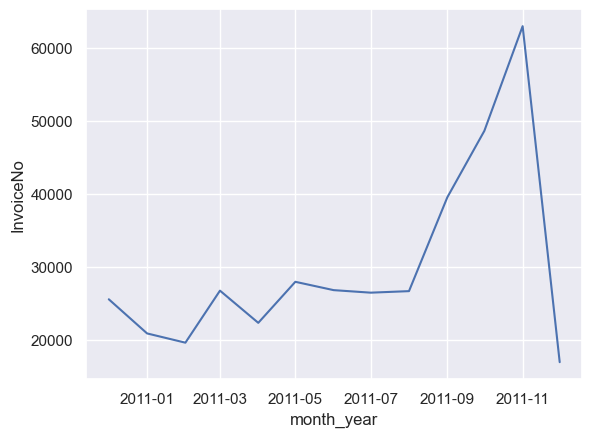

In [35]:
ax = sns.lineplot(x="month_year", y="InvoiceNo", data = plot)

# How many orders per day?
Interesting fact is that there were not any transaction on Saturday during the whole period. One of the explanations colud be some filter during the data collection process. Number of buyings are not significantly differ according to the day of the week.

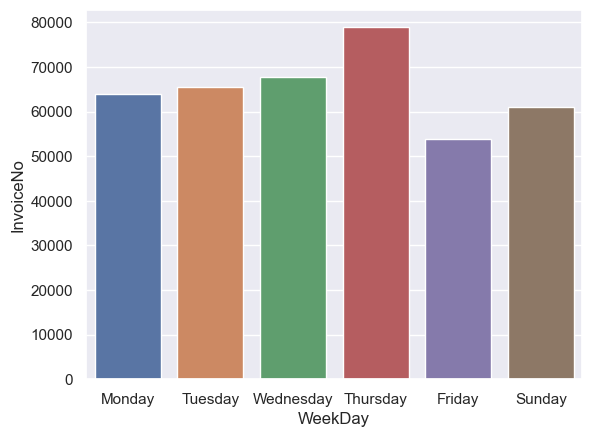

In [36]:
 ax = sns.barplot(x="WeekDay", y="InvoiceNo", data = plot2)

# How many orders per hour?
The most number of transactions is done between 12 a.m. and 2 p.m., people tend to make there purchase during the lunch time. There aren't any transactions after 8 p.m. till 6 a.m.

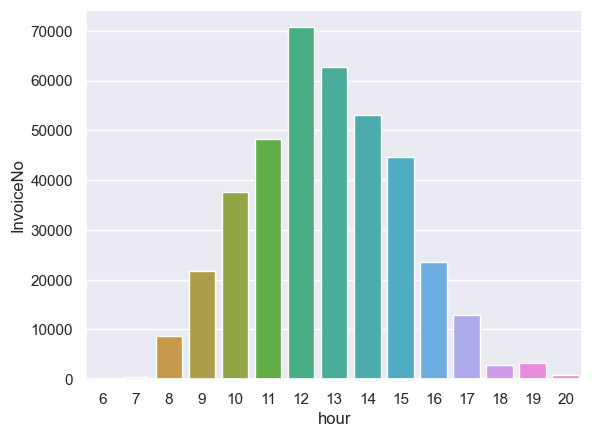

In [37]:
ax = sns.barplot(x="hour", y="InvoiceNo", data = plot3)

# Which month brings the highest revenue?
The highest sales are also during the November, as the number of purchasing is the highest.

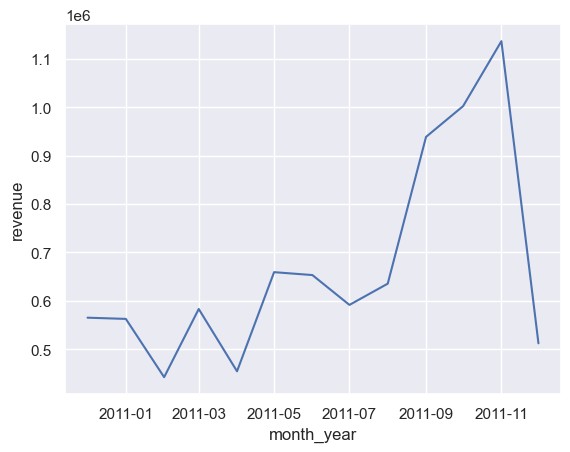

In [38]:
ax = sns.lineplot(x = 'month_year', y='revenue', data = plot5)

# 2.3 Price
From the descriptive statistics for price variable, we could see that most ot the sold products are quite cheap. Probably retail sells some small items, as office supplies, small decorations etc.

In [39]:
pd.DataFrame(data['UnitPrice'].describe())

,UnitPrice
count,391150.000000
mean,2.874372
std,4.284738
min,0.040000
25%,1.250000
50%,1.950000
75%,3.750000
max,649.500000


In [40]:
data[data['UnitPrice']>50]['Description'].unique().tolist()

['rustic  seventeen drawer sideboard',
 'vintage post office cabinet',
 'vintage red kitchen cabinet',
 'regency mirror with shutters',
 'love seat antique white metal',
 'vintage blue kitchen cabinet',
 'school desk and chair ',
 'chest natural wood 20 drawers',
 'decorative hanging shelving unit',
 'picnic basket wicker 60 pieces']

# Price distribution of expensive goods :

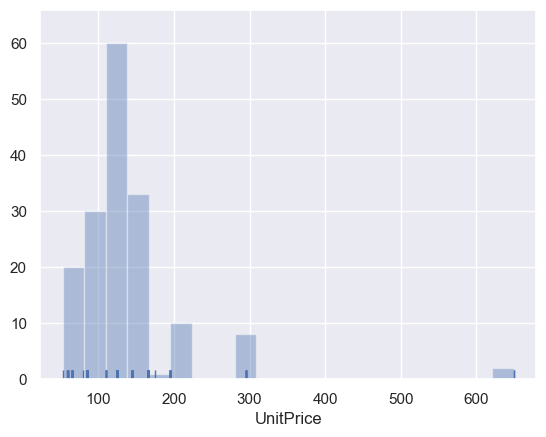

In [41]:
sns.distplot(data[data['UnitPrice']>50]['UnitPrice'], kde=False, rug=True);

# 2.3 Transactions by countries
The most unique customers are from United Kingdom, for this reason it is better to concetrate on UK for customer segmentation.

In [42]:
customer_country=data[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
35,United Kingdom,3916
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,12
1,Austria,11


In [43]:
print("Transactions were made in", len(data['Country'].unique().tolist()), "different countries")

Transactions were made in 37 different countries


In [44]:
print("Number of transactions where country is unspecified:", len(data[data['Country']=='Unspecified']))

Number of transactions where country is unspecified: 241


In [45]:
plot6 = pd.DataFrame(data.groupby(['Country'])['revenue'].sum()).reset_index()
plot6 = plot6.sort_values(['revenue']).reset_index(drop=True)
plot7 = pd.DataFrame(data.groupby(['Country'])['revenue'].count()).reset_index()
plot7 = plot7.sort_values(['revenue']).reset_index(drop=True)

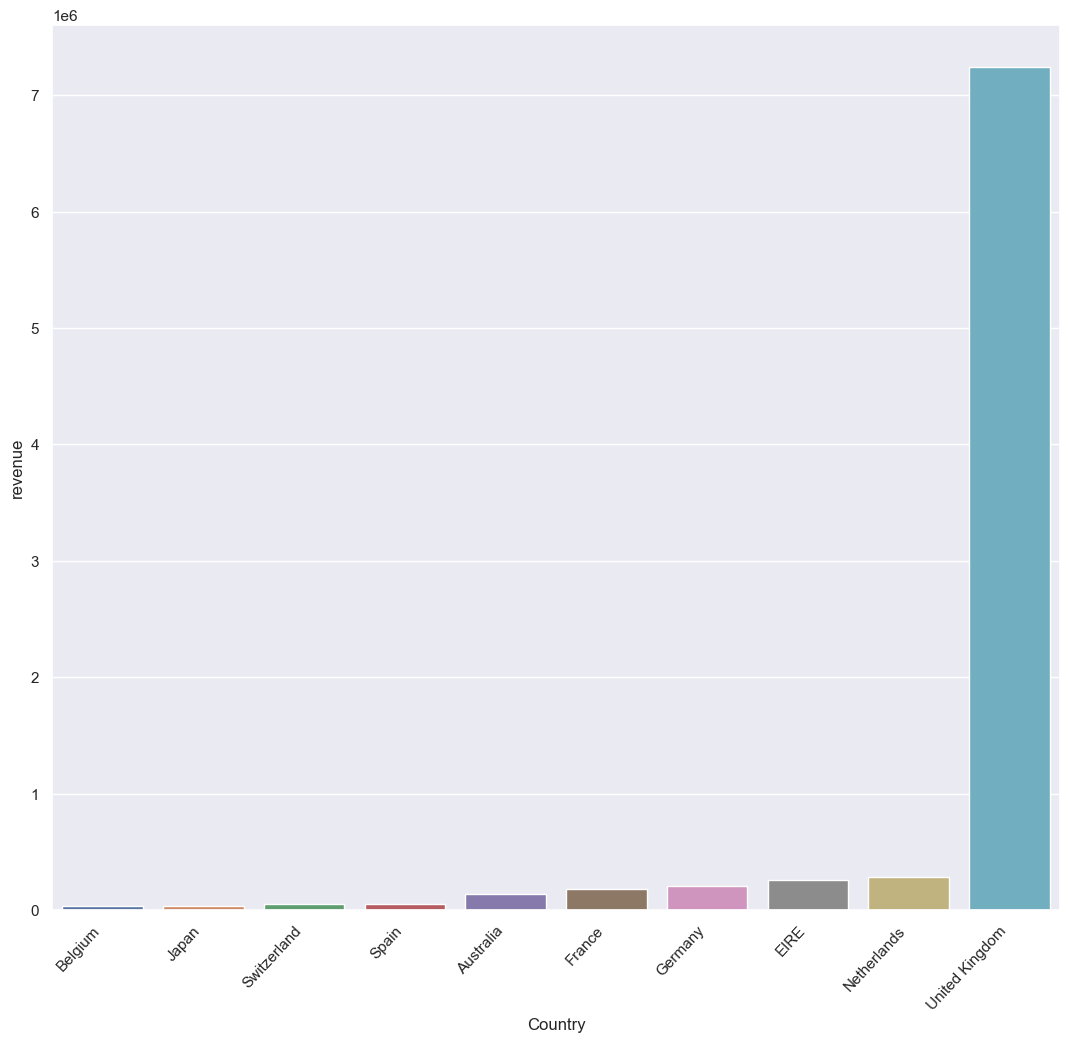

In [46]:
#The most sales makes United Kingdom
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='revenue',data=plot6.tail(10),estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

# Countries by number of orders:
The biggest number of orders are made in United Kingdom, which is expected, because the store is UK-based.

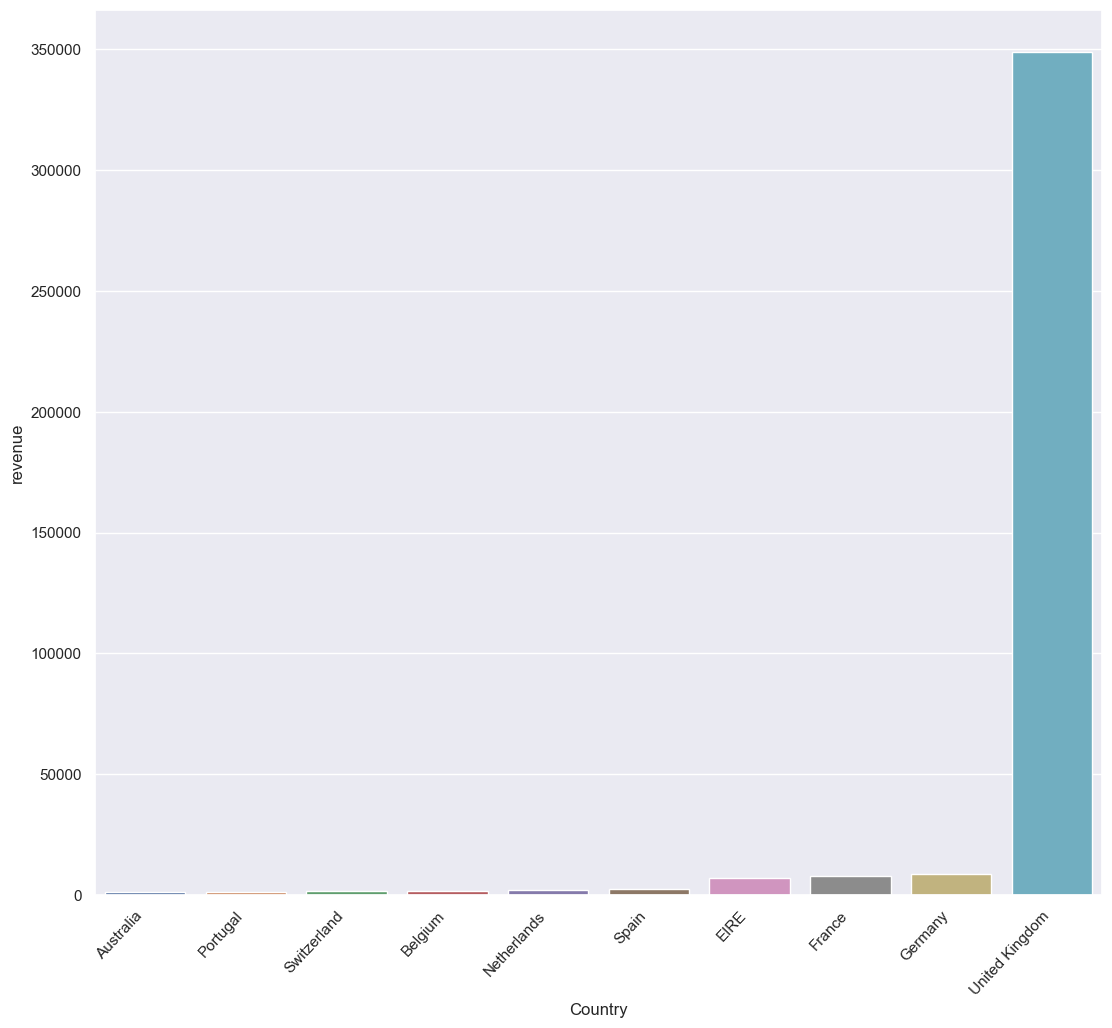

In [47]:
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='revenue',data=plot7.tail(10),estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

# 3. Analysis
3.1 Top Customers
Calculate how often did particular customer make purchase during the year:

In [48]:
data['freq'] = data.groupby('CustomerID')['CustomerID'].transform('count')

In [49]:
customer  = pd.DataFrame(data.groupby(['CustomerID'])['revenue'].sum().sort_values(ascending=False)).reset_index().head(10)

In [50]:
customer['CustomerID'].tolist()

[14646.0,
 18102.0,
 17450.0,
 16446.0,
 14911.0,
 12415.0,
 14156.0,
 17511.0,
 12346.0,
 16029.0]

# 3.2 RFM analysis
Select only UK customers:

In [51]:
df_uk = data[data['Country'] == "United Kingdom"]
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,month_year,hour,revenue,freq
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,15.30,297
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34,297
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,22.00,297
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34,297
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34,297


In [52]:
print(df_uk['InvoiceDate'].min())
print(df_uk['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:49:00


In [53]:
import datetime as dt
presence = dt.datetime(2011,12,10)
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'])

Calculate recency, frequency and monetary values:

Recency (R) as days since last purchase: How many days ago was their last purchase? Deduct most recent purchase date from today to calculate the recency value. 1 day ago? 14 days ago? 500 days ago?

Frequency (F) as total number of transactions: How many times has the customer purchased from our store? For example, if someone placed 10 orders over a period of time, their frequency is 10.

Monetary (M) as total money spent: How many $$ (or whatever is your currency of calculation) has this customer spent? Again limit to last two years – or take all time. Simply total up the money from all transactions to get the M value.

In [54]:
rfm = df_uk.groupby('CustomerID').agg({'InvoiceDate': lambda x: (presence - x.max()).days, 'InvoiceNo': lambda x: len(x), 'revenue': lambda x: x.sum()})
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'revenue': 'monetary_value'}, inplace=True)

In [55]:
rfm.head()

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4397,31650.78
12749.0,3,198,4040.88
12820.0,3,59,942.34


In [56]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [57]:
rfm_segments= rfm

In [58]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [59]:
rfm_segments['R_Quartile'] = rfm_segments['recency'].apply(RClass, args=('recency',quantiles,))
rfm_segments['F_Quartile'] = rfm_segments['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfm_segments['M_Quartile'] = rfm_segments['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [60]:
rfm_segments['RFMClass'] = rfm_segments.R_Quartile.map(str) \
                            + rfm_segments.F_Quartile.map(str) \
                            + rfm_segments.M_Quartile.map(str)

In [61]:
rfm_segments.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4397,31650.78,1,1,1,111
12749.0,3,198,4040.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


In [62]:
rfm_segments['RFMClass'].unique()

array(['441', '111', '122', '444', '322', '341', '333', '133', '231',
       '233', '433', '311', '212', '332', '223', '222', '324', '443',
       '321', '312', '422', '343', '344', '211', '411', '423', '112',
       '243', '142', '234', '121', '442', '221', '131', '134', '334',
       '213', '244', '143', '434', '144', '431', '113', '432', '132',
       '331', '242', '342', '424', '323', '123', '232', '224', '124',
       '412', '241', '313', '413', '421', '114', '141'], dtype=object)

In [63]:
rfm_segments.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4397,31650.78,1,1,1,111
12749.0,3,198,4040.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


In [64]:
print("Champions: ",len(rfm_segments[rfm_segments['RFMClass']=='111']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='111'])/len(rfm_segments)*100,2), "%)") 
print('Loyal Customers: ',len(rfm_segments[rfm_segments['F_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['F_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print("Big Spenders: ",len(rfm_segments[rfm_segments['M_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['M_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print('About to Sleep: ', len(rfm_segments[rfm_segments['RFMClass']=='322']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='322'])/len(rfm_segments)*100,2), "%)")
print('Lost Customers: ',len(rfm_segments[rfm_segments['RFMClass']=='444']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='444'])/len(rfm_segments)*100,2), "%)")


Champions:  407 ( 10.39 %)
Loyal Customers:  967 ( 24.69 %)
Big Spenders:  979 ( 25.0 %)
About to Sleep:  147 ( 3.75 %)
Lost Customers:  340 ( 8.68 %)
